In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("thyroid_cancer_risk_data.csv")
data.head(5)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [4]:
yes_no_columns = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                  'Smoking', 'Obesity', 'Diabetes']
data["Thyroid_Cancer_Risk"]=data["Thyroid_Cancer_Risk"].replace({"Low":0,"Medium":1,"High":2})
data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_19272/1935485377.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Thyroid_Cancer_Risk"]=data["Thyroid_Cancer_Risk"].replace({"Low":0,"Medium":1,"High":2})
/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_19272/1935485377.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0})


In [5]:
data=data.drop(["Patient_ID"],axis=1)

In [6]:
data.head(5)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,Benign
1,29,Male,Germany,Hispanic,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,Benign
2,86,Male,Nigeria,Caucasian,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,Benign
3,75,Female,India,Asian,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1,Benign
4,35,Female,Germany,African,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2,Benign


In [7]:
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["Country"]=le.fit_transform(data["Country"])
data["Ethnicity"]=le.fit_transform(data["Ethnicity"])
data["Diagnosis"]=le.fit_transform(data["Diagnosis"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Gender               212691 non-null  int64  
 2   Country              212691 non-null  int64  
 3   Ethnicity            212691 non-null  int64  
 4   Family_History       212691 non-null  int64  
 5   Radiation_Exposure   212691 non-null  int64  
 6   Iodine_Deficiency    212691 non-null  int64  
 7   Smoking              212691 non-null  int64  
 8   Obesity              212691 non-null  int64  
 9   Diabetes             212691 non-null  int64  
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  int64  
 15  Diagnosis        

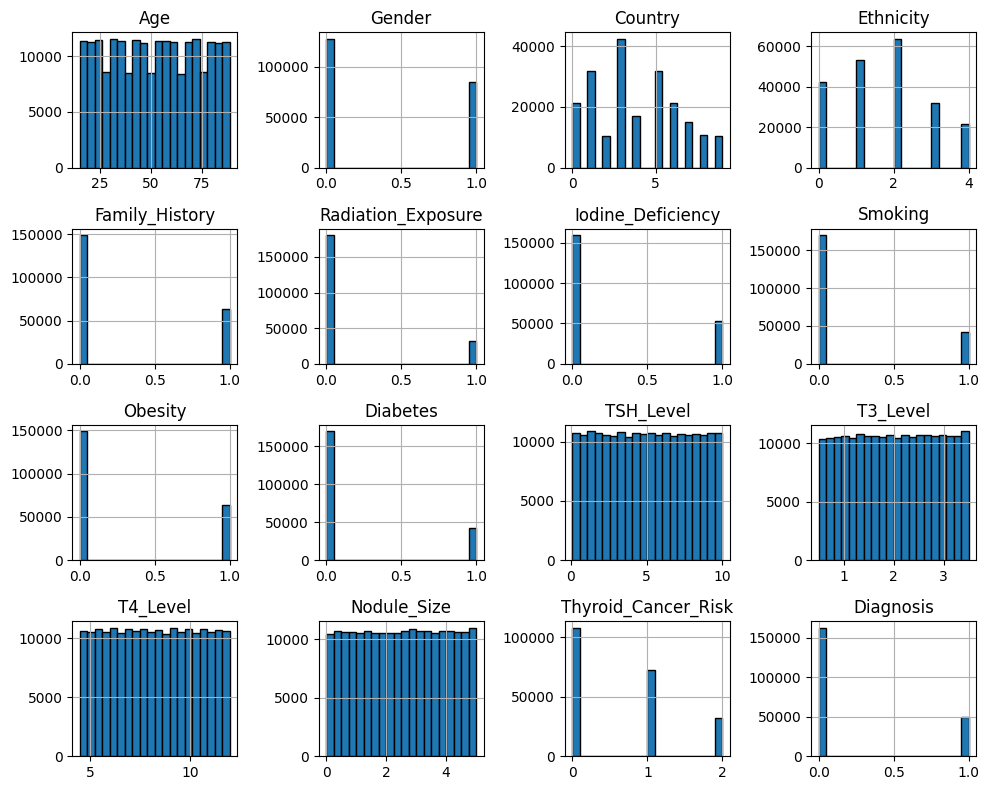

In [9]:
data.hist(bins=20, edgecolor='black', figsize=(10, 8)) 
plt.tight_layout() 
plt.show()

<Axes: >

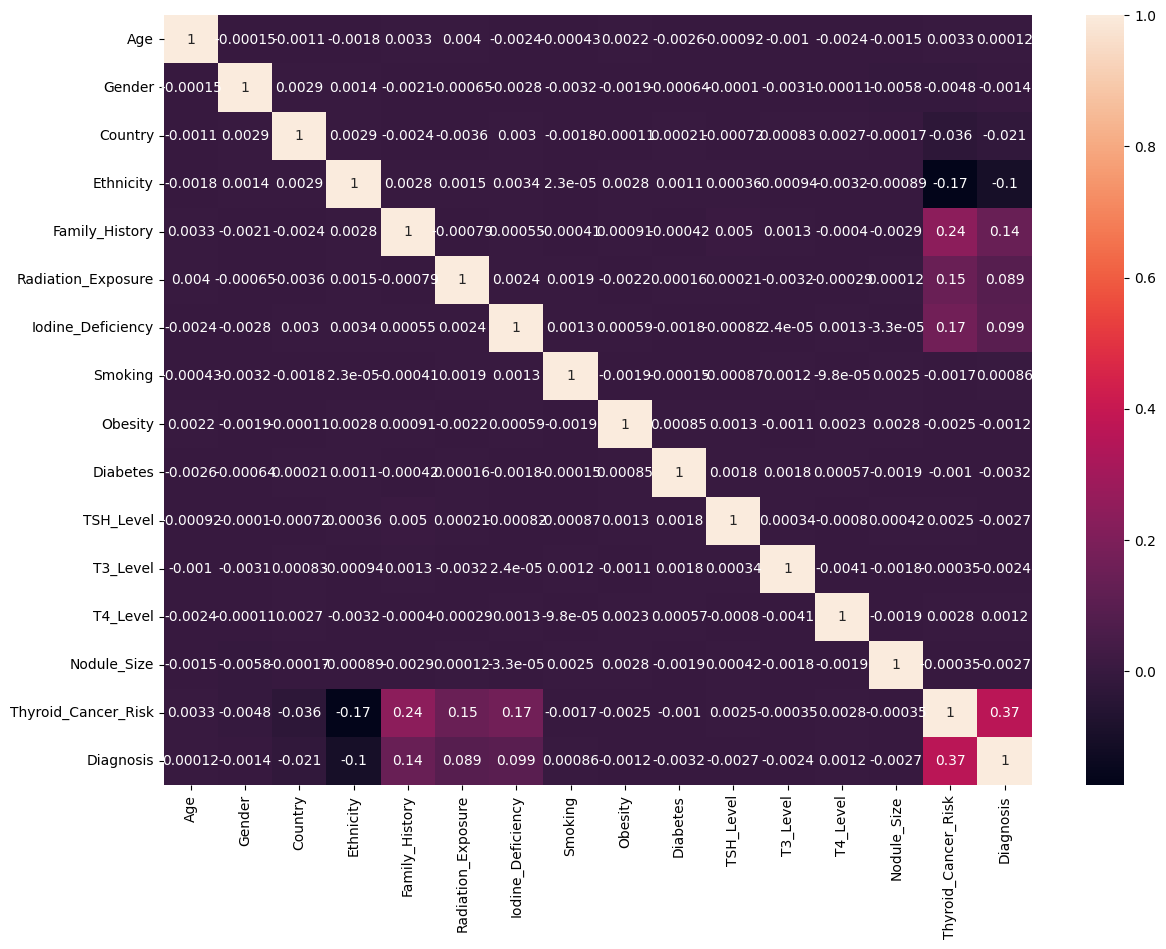

In [10]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)

In [11]:
ss=StandardScaler()
x=data.drop(["Thyroid_Cancer_Risk"],axis=1)
y=data["Thyroid_Cancer_Risk"]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [14]:
classifier={
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Gradiant Boosting Classifier":GradientBoostingClassifier(),
    "Naive Bayes":GaussianNB(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "LGBM Classifier":LGBMClassifier() 
}

In [15]:
results={}
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    results[name] = accuracy*100

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 170152, number of used features: 15
[LightGBM] [Info] Start training from score -0.674296
[LightGBM] [Info] Start training from score -1.077077
[LightGBM] [Info] Start training from score -1.897818


In [16]:
results_df = pd.DataFrame(list(results.items()), columns=["Classifier", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

In [17]:
results_df

,Classifier,Accuracy
2,Gradiant Boosting Classifier,66.038224
5,LGBM Classifier,65.948894
1,Random Forest Classifier,64.143492
0,Decision Tree Classifier,59.272667
4,Ada Boost Classifier,59.220950
3,Naive Bayes,57.121700


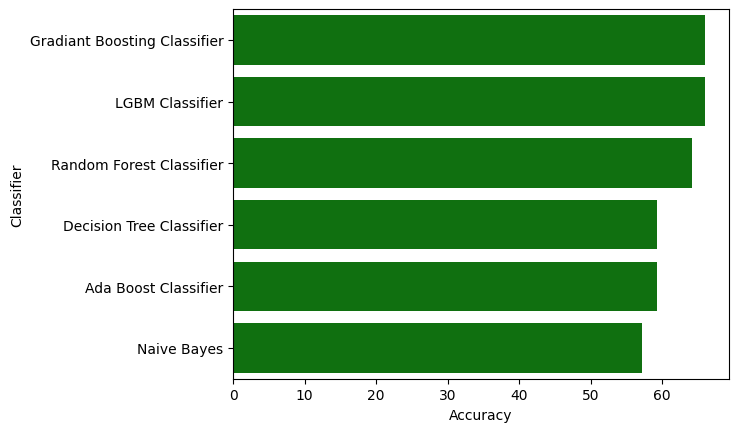

In [18]:
sns.barplot(x="Accuracy",y="Classifier",data=results_df,color="green")
plt.show()